In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
import urllib
from bs4 import BeautifulSoup

In [2]:
def scrap_html():
    walk_dir = "gap-html/gap-html/"
    books = pd.DataFrame(columns=['book_name', 'contents'])
    
    print('walk_dir = ' + walk_dir)
    print('walk_dir (absolute) = ' + os.path.abspath(walk_dir))
    
    book_id = 0
    for root, subdirs, files in os.walk(walk_dir):
        if book_id == 0:
            book_id+=1
            continue
        path, book_name = os.path.split(root)
        all_text = ""
        for filename in files:
            #Get file path
            file_path = os.path.join(root, filename)
            #Read file
            soup = BeautifulSoup(open(file_path), "html.parser")
            ocr_tags = soup.select(".ocr_cinfo")
            #Extract text
            text_list = [tag.get_text() for tag in ocr_tags]
            text = ' '.join(text_list)
            if text.strip() != '':
                #concat text in each page and add to dataframe
                all_text = all_text + text + ' '
        books.loc[book_id] = [book_name, all_text]
        print('Save book: ' + book_name)
        book_id += 1
    return books

In [3]:
books = scrap_html()

walk_dir = gap-html/gap-html/
walk_dir (absolute) = /home/sebastian/Documents/Scoala/Data Mining/gap-html/gap-html
Save book: gap_m_6B1DkImIoC
Save book: gap_9ksIAAAAQAAJ
Save book: gap_fnAMAAAAYAAJ
Save book: gap_XmqHlMECi6kC
Save book: gap_GIt0HMhqjRgC
Save book: gap_IlUMAQAAMAAJ
Save book: gap_pX5KAAAAYAAJ
Save book: gap_TgpMAAAAYAAJ
Save book: gap_ogsNAAAAIAAJ
Save book: gap_aLcWAAAAQAAJ
Save book: gap_Bdw_AAAAYAAJ
Save book: gap_2X5KAAAAYAAJ
Save book: gap_-C0BAAAAQAAJ
Save book: gap_dIkBAAAAQAAJ
Save book: gap_WORMAAAAYAAJ
Save book: gap_MEoWAAAAYAAJ
Save book: gap_udEIAAAAQAAJ
Save book: gap_DqQNAAAAYAAJ
Save book: gap_DhULAAAAYAAJ
Save book: gap_y-AvAAAAYAAJ
Save book: gap_CSEUAAAAYAAJ
Save book: gap_VPENAAAAQAAJ
Save book: gap_CnnUAAAAMAAJ
Save book: gap_RqMNAAAAYAAJ


In [4]:
print(books)

           book_name                                           contents
1   gap_m_6B1DkImIoC  . 28. ROMAN HISTORY. 443 annihilation with the...
2   gap_9ksIAAAAQAAJ  86 THE PELOPONNESIAN WARi B.V. *' tion, that, ...
3   gap_fnAMAAAAYAAJ  B. IV. YEAR VII. BEtORE CHRIST 425. 331 (for P...
4   gap_XmqHlMECi6kC  CHAP. LI. the forest, or rather wilderness, wa...
5   gap_GIt0HMhqjRgC  OF THE ROMAN EMPIRE. 425 male; and as she move...
6   gap_IlUMAQAAMAAJ  OF THE ROMAN EMPIRE. 425 to imagine, that the ...
7   gap_pX5KAAAAYAAJ  Printed by T. Davison, Whitefriars. 88 THE ANN...
8   gap_TgpMAAAAYAAJ  ait. 453.] 413 ANTIQUITIES OF THE JEWS. you ta...
9   gap_ogsNAAAAIAAJ  B. II.") AGAINST APION. 1^9 exercise of virtue...
10  gap_aLcWAAAAQAAJ  Ixii NOTES ON THE FOURTEENTH CHAPTER. Ceni« ar...
11  gap_Bdw_AAAAYAAJ  OF ROME. 409 "in command, he has rendered himf...
12  gap_2X5KAAAAYAAJ  88 THE HISTORY 1 A. U. C A. D. book prince. By...
13  gap_-C0BAAAAQAAJ    506 PHIGALIX PUIGAUA. (Paus. viii. 39. §

In [26]:
titles = ["Titus Livius' Roman History",
          "The History of the Peloponnesian War vol. II",
          "The History of the Peleponnesian War vol. I",
          "The History of the Decline and Fall of the Roman Empire vol. VI",
          "The History of the Decline and Fall of the Roman Empire vol. IV",
          "The History of the Decline and Fall of the Roman Empire vol. II",
          "The Works of Corenlius Tacitus vol. IV",
          "The Genuine Works of Flavius Josephus",
          "The Works of Josephus vol. IV",
          "The History of the Decline and Fall of the Roman Empire vol. I",
          "The History of Rome vol. I",
          "The Works of Cornelius Tacitus vol. V",
          "Dictionary of Greek and Roman Geography vol. II",
          "The History of Rome vol. III",
          "The Histories of Caius Cornelius Tacitus",
          "The Historical Annals of Cornelius Tacitus",
          "Pliny's Natural History",
          "Livy vol. III",
          "The Description of Greece",
          "The Works of Flavius Josephus vol. III",
          "The History of the Decline and Fall of the Roman Empire vol. III",
          "The History of the Decline and Fall of the Roman Empire vol. V",
          "The Whole Genuine Works of Flavius Josephus vol. II",
          "Livy vol. V"
         ]

author = ["William Gordon",
          "William Smith",
          "William Smith",
          "Edward Gibbon",
          "Thomas Bowdler",
          "Thomas Bowdler",
          "Arthur Murphy",
          "Flavius Josephus",
          "William Whiston",
          "Edward Gibbon",
          "Titus Livius",
          "Arthur Murphy",
          "William Smith",
          "Theodor Mommsen",
          "Caius Cornelius Tacitus",
          "Arthur Murphy",
          "John Bostock",
          "George Baker",
          "Paus Anias",
          "Titus Flavius Josephus",
          "Edward Gibbon",
          "Edward Gibbon",
          "William Whiston",
          "George Baker"
         ]

In [5]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [6]:
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [7]:
# load nltk's SnowballStemmer as variabled 'stemmer'
# It's the process of breaking a word down into its root
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [8]:
# Define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
     # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sebastian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in range(1, len(books['contents'])):
    allwords_stemmed = tokenize_and_stem(books['contents'].loc[i])
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(books['contents'].loc[i])
    totalvocab_tokenized.extend(allwords_tokenized)

In [11]:
vocab_frame = pd.DataFrame({'words' : totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 5710474 items in vocab_frame


In [12]:
vocab_frame.head()

,words
roman,ROMAN
histori,HISTORY
annihil,annihilation
with,with
thevejeot,theVejeotes


To get a Tf-idf matrix, first count word occurrences by document. This is transformed into a document-term matrix (dtm). This is also just called a term frequency matrix. An example of a dtm is here at right.

Then apply the term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.



A couple things to note about the parameters I define below:

1. max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses)
2. min_idf: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. Here I pass 0.2; the term must be in at least 20% of the document. I found that if I allowed a lower min_df I ended up basing clustering on names--for example "Michael" or "Tom" are names found in several of the movies and the synopses use these names frequently, but the names carry no real meaning.
3. ngram_range: this just means I'll look at unigrams, bigrams and trigrams.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, max_features=300000,
                                  min_df=0.1, stop_words='english',
                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

# fit the vectorizer to synopses
%time tfidf_matrix = tfidf_vectorizer.fit_transform(books['contents'])

print(tfidf_matrix.shape)

/home/sebastian/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 5min 31s, sys: 2.79 s, total: 5min 34s
Wall time: 5min 36s
(24, 172688)


In [17]:
terms = tfidf_vectorizer.get_feature_names()

dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each book among the books). Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.

Note that with dist it is possible to evaluate the similarity of any two or more books.

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

Now onto the fun part. Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopses. I first chose k-means. K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and centroids recalculated in an iterative process until the algorithm reaches convergence.

I found it took several runs for the algorithm to converge a global optimum as k-means is susceptible to reaching local optima.

In [95]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print(clusters)

CPU times: user 33.1 s, sys: 99.7 ms, total: 33.2 s
Wall time: 27 s
[2, 4, 4, 0, 0, 0, 2, 3, 3, 0, 2, 2, 1, 2, 1, 2, 1, 2, 4, 3, 0, 0, 3, 2]


I use joblib.dump to pickle the model, once it has converged and to reload the model/reassign the labels as the clusters.

In [96]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

Here, I create a dictionary of titles, ranks, the synopsis, the cluster assignment, and the genre [rank and genre were scraped from IMDB].

I convert this dictionary to a Pandas DataFrame for easy access. I'm a huge fan of Pandas and recommend taking a look at some of its awesome functionality which I'll use below, but not describe in a ton of detail.

In [97]:
import numpy as np

print(clusters)

book_array = {'book_name': books['book_name'], 'clusters': clusters, 'contents': books['contents']}

book_frame = pd.DataFrame(book_array, columns=['book_name', 'clusters'])

book_frame['book_name'].update(books['book_name'])

book_frame.index = [clusters]

print(book_frame)

book_frame['clusters'].value_counts() #number of films per cluster (clusters from 0 to 4)

[2, 4, 4, 0, 0, 0, 2, 3, 3, 0, 2, 2, 1, 2, 1, 2, 1, 2, 4, 3, 0, 0, 3, 2]
          book_name  clusters
2  gap_m_6B1DkImIoC         2
4  gap_9ksIAAAAQAAJ         4
4  gap_fnAMAAAAYAAJ         4
0  gap_XmqHlMECi6kC         0
0  gap_GIt0HMhqjRgC         0
0  gap_IlUMAQAAMAAJ         0
2  gap_pX5KAAAAYAAJ         2
3  gap_TgpMAAAAYAAJ         3
3  gap_ogsNAAAAIAAJ         3
0  gap_aLcWAAAAQAAJ         0
2  gap_Bdw_AAAAYAAJ         2
2  gap_2X5KAAAAYAAJ         2
1  gap_-C0BAAAAQAAJ         1
2  gap_dIkBAAAAQAAJ         2
1  gap_WORMAAAAYAAJ         1
2  gap_MEoWAAAAYAAJ         2
1  gap_udEIAAAAQAAJ         1
2  gap_DqQNAAAAYAAJ         2
4  gap_DhULAAAAYAAJ         4
3  gap_y-AvAAAAYAAJ         3
0  gap_CSEUAAAAYAAJ         0
0  gap_VPENAAAAQAAJ         0
3  gap_CnnUAAAAMAAJ         3
2  gap_RqMNAAAAYAAJ         2


2    8
0    6
3    4
4    3
1    3
Name: clusters, dtype: int64

In [98]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

print(num_clusters)

for i in range(num_clusters):
    print(i)
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    
    print("Cluster %d titles:" % i, end='')
    for title in book_frame.ix[i]['book_name'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()
    

Top terms per cluster:

5
0
Cluster 0 words:

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


 b'decline', b'Justinian', b'fall', b'Christians', b'decline', b'Constantinople',
Cluster 0 titles: gap_XmqHlMECi6kC, gap_GIt0HMhqjRgC, gap_IlUMAQAAMAAJ, gap_aLcWAAAAQAAJ, gap_CSEUAAAAYAAJ, gap_VPENAAAAQAAJ,

1
Cluster 1 words: b'cf'

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


, b'Strab', b'pp', b'minium', b'II', b'Sc',
Cluster 1 titles: gap_-C0BAAAAQAAJ, gap_WORMAAAAYAAJ, gap_udEIAAAAQAAJ,

2
Cluster 2 words: b'Lucius', b'Germanicus', b'Samnites', b'Sulla', b'Otho', b'Carthaginian',
Cluster 2 titles: gap_m_6B1DkImIoC, gap_pX5KAAAAYAAJ, gap_Bdw_AAAAYAAJ, gap_2X5KAAAAYAAJ, gap_dIkBAAAAQAAJ, gap_MEoWAAAAYAAJ, gap_DqQNAAAAYAAJ, gap_RqMNAAAAYAAJ,

3
Cluster 3 words: b'Herod', b'Josephus', b'antiquity', b'Jerusalem', b'Hyrcanus', b'Judea',
Cluster 3 titles: gap_TgpMAAAAYAAJ, gap_ogsNAAAAIAAJ, gap_y-AvAAAAYAAJ, gap_CnnUAAAAMAAJ,

4
Cluster 4 words: b'PELOPONNESIAN', b'PELOPONNESIAN', b'fays', b'Lacedaemonians', b'hath', b'Thebans',
Cluster 4 titles: gap_9ksIAAAAQAAJ, gap_fnAMAAAAYAAJ, gap_DhULAAAAYAAJ,



In [102]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=5)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [48]:
# #set up colors per clusters using a dict
# cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#800000', 5: '#008000', 6: '#00FFFF'}

# # #set up cluster names using a dict
# # cluster_names = {0: 'PELOPONNESIAN, Sulla, fays', 
# #                  1: 'Justinian, Christians, Constantinopole', 
# #                  2: 'Germanicus, Samnites, Lucius',
# #                  3: 'Herod, Josephus, Hyrcanus'}

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
# cluster_names = {0: 'Christian, Constantinople, Justinian', 
#                  1: 'Herod, Jerusalem, Judea', 
#                  2: 'Sulla, Lucius, Hannibal', 
#                  3: 'Germanicus, Galba, Otho', 
#                  4: 'PELOPONNESIAN, Lacedaemonians, fays'}

/home/sebastian/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


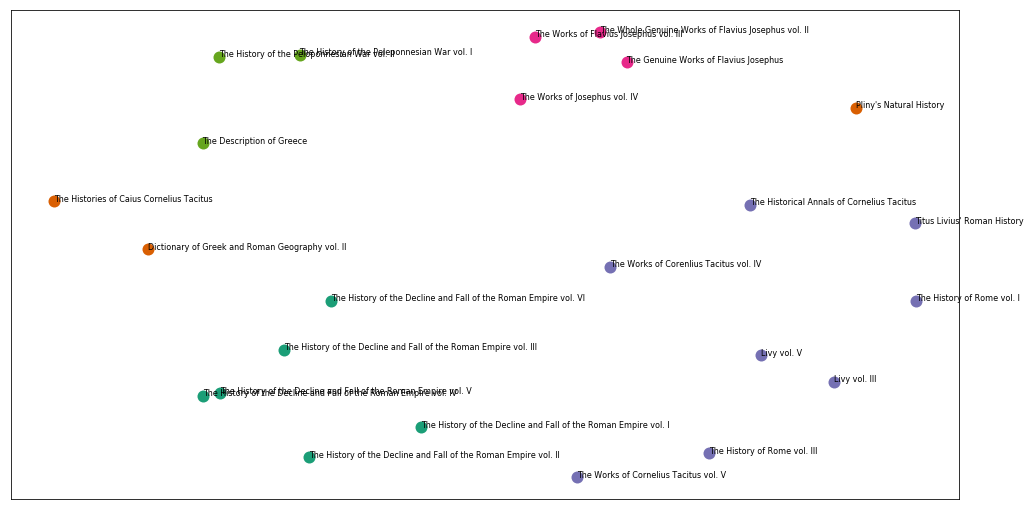

In [164]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=120)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
# ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title

for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)
 
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

t-SNE done! Time elapsed: {} seconds0.08695769309997559
[[-0.7118015   0.6187701 ]
 [-2.253404   -4.876458  ]
 [ 1.4270439   0.6936908 ]
 [-0.57752347  0.4842062 ]
 [ 2.2902226   3.822143  ]
 [ 1.0538759  -4.445154  ]
 [ 0.15267277 -1.3679521 ]
 [ 3.3546615  -1.1861296 ]
 [ 3.7892313  -4.7450466 ]
 [ 1.4179729  -1.5697718 ]
 [ 0.83095056 -0.21418   ]
 [ 0.77031803  9.715658  ]
 [ 1.4466249   5.1571455 ]
 [-1.0672293  -5.896974  ]
 [ 9.861643    3.5595727 ]
 [ 1.222282   -4.950382  ]
 [-0.44036853 -1.0497973 ]
 [ 1.3088875  -0.36434662]
 [-1.7809236   2.8104591 ]
 [-8.625324   -3.8545172 ]
 [ 4.636631   -6.4441724 ]
 [-1.2034259   5.3767815 ]
 [ 2.0685909   2.7015648 ]
 [-4.6436405   8.40786   ]]


/home/sebastian/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


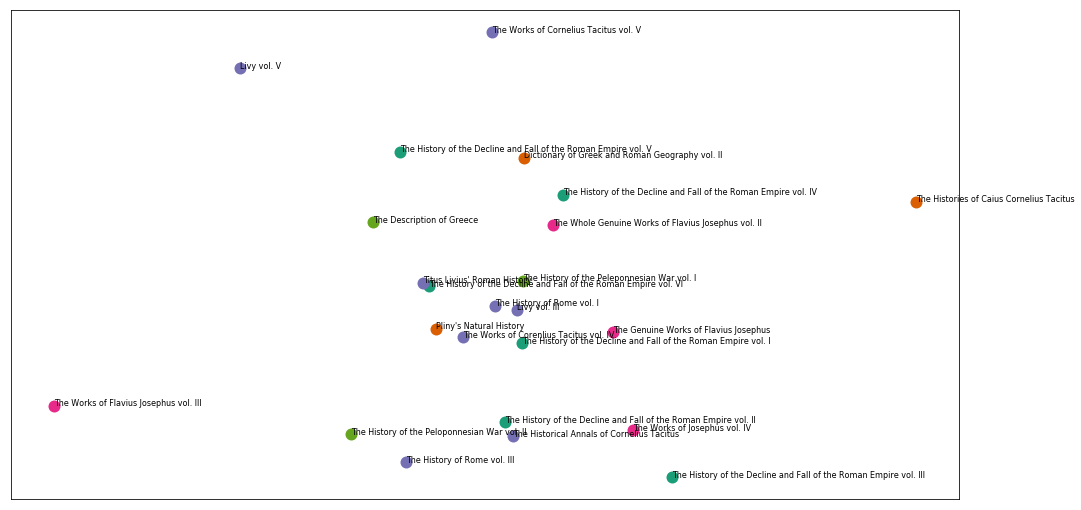

In [221]:
import time
# from ggplot import *

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, 
            perplexity=50.0, 
            early_exaggeration=12.0, 
            learning_rate=100.0, 
            n_iter=250, 
            n_iter_without_progress=600, 
            min_grad_norm=0.000001,  
            init='random', 
            metric='euclidean',
            verbose=0, 
            random_state=None, 
            method='barnes_hut', 
            angle=0.5)

tsne_results = tsne.fit_transform(dist)

print ('t-SNE done! Time elapsed: {} seconds' + format(time.time()-time_start))

print(tsne_results)

# df_tsne = dist
# df_tsne['x-tsne'] = tsne_results[:,0]
# df_tsne['y-tsne'] = tsne_results[:,1]

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=tsne_results[:, 0], y=tsne_results[:, 1], label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
# ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title

for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)
 
plt.show() #show the plot

# chart = ggplot(dist) \
#         + geom_point(size=70,alpha=0.1) \
#         + ggtitle("tSNE dimensions colored by digit")
# chart

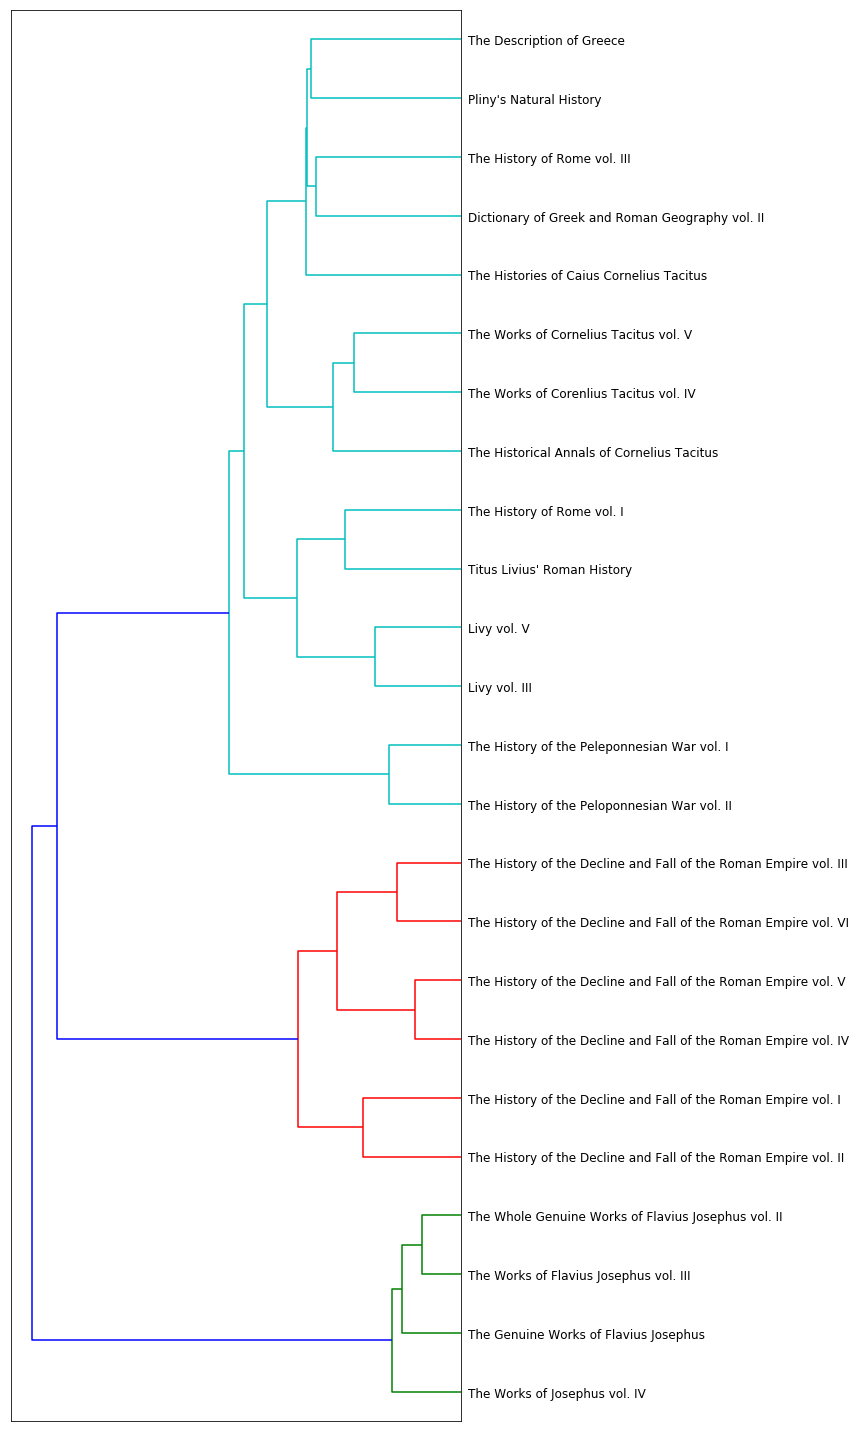

In [97]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(12, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="left", labels=titles, leaf_font_size=12);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters